# Zalando's case study

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

In [5]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import time

In [6]:


train = pd.read_csv('./fashion-mnist_train.csv')
test = pd.read_csv('./fashion-mnist_test.csv')



FileNotFoundError: [Errno 2] No such file or directory: './fashion-mnist_train.csv'

In [ ]:
class_names = {
    0: 'T-shirt/Top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}
class_labels = list(class_names.keys())
class_label_names = list(class_names.values())

In [ ]:
print(train.isnull().any().sum())

0


In [ ]:
print(test.isnull().any().sum())

0


In [ ]:
y_train = train['label']
y_train.shape

(60000,)

In [ ]:
X_train=train.drop(['label'],axis = 1)
X_train


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train.shape

(60000, 784)

In [ ]:
y_test = test['label']
y_test.shape

(10000,)

In [ ]:

X_test = test.drop(['label'],axis = 1)
X_test.shape


(10000, 784)

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

## Model training and evaluation

In [ ]:

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 0)

### Logistic regression

In [ ]:

start1 = time.time()

logistic = LogisticRegression(max_iter=200, solver='liblinear')
logistic.fit(X_train, y_train)

end1 = time.time()
lr_time = end1-start1


/home/ruben/EC/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


In [ ]:
# K- Nearest Neighbours

In [ ]:

start2 = time.time()
knn = KNeighborsClassifier(n_neighbors = 5, weights='uniform', p=2, metric='euclidean')
knn.fit(X_train, y_train)

end2 = time.time()
knn_time = end2-start2

In [ ]:
start3 = time.time()
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
end3 = time.time()
dt_time = end3 - start3

In [ ]:
print("LR Time: {:0.2f} minute".format(lr_time/60.0))
print("KNN Time: {:0.2f} minute".format(knn_time/60.0))
print("Decision Tree Time: {:0.2f} minute".format(dt_time/60.0))


LR Time: 1.01 minute
KNN Time: 0.00 minute
Decision Tree Time: 0.31 minute


In [ ]:
y_val

3048     1
19563    6
58303    8
8870     7
40228    0
        ..
47049    8
31629    8
50430    4
21574    9
10617    3
Name: label, Length: 12000, dtype: int64

In [ ]:
y_train_lr = logistic.predict(X_train)
y_pred_lr = logistic.predict(X_val)
logistic_train = metrics.accuracy_score(y_train,y_train_lr )
logistic_accuracy = metrics.accuracy_score(y_val, y_pred_lr)

print("Train Accuracy score: {}".format(logistic_train))
print("Validation Accuracy score: {}".format(logistic_accuracy))
print(metrics.classification_report(y_val, y_pred_lr, target_names=class_label_names))


Train Accuracy score: 0.8741041666666667
Validation Accuracy score: 0.8513333333333334
              precision    recall  f1-score   support

 T-shirt/Top       0.78      0.83      0.80      1189
     Trouser       0.98      0.97      0.97      1189
    Pullover       0.74      0.78      0.76      1204
       Dress       0.85      0.88      0.86      1260
        Coat       0.75      0.77      0.76      1208
      Sandal       0.94      0.93      0.94      1188
       Shirt       0.66      0.54      0.59      1195
     Sneaker       0.92      0.93      0.92      1160
         Bag       0.93      0.94      0.94      1210
  Ankle Boot       0.95      0.94      0.95      1197

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



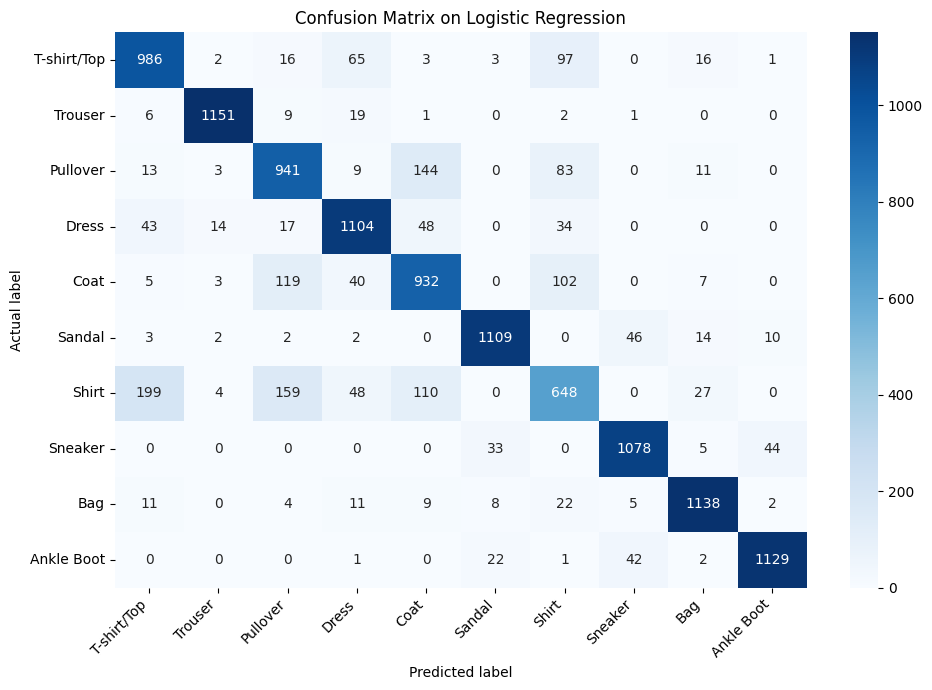

In [ ]:
con_matrix = confusion_matrix(y_val, y_pred_lr, labels=class_labels)
plt.figure(figsize = (10,7))
plt.title("Confusion Matrix on Logistic Regression")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g',
            xticklabels=class_label_names, yticklabels=class_label_names)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Train Accuracy score: 0.89675
Validation Accuracy score: 0.856
              precision    recall  f1-score   support

 T-shirt/Top       0.75      0.87      0.81      1189
     Trouser       1.00      0.96      0.98      1189
    Pullover       0.74      0.83      0.78      1204
       Dress       0.90      0.89      0.89      1260
        Coat       0.79      0.77      0.78      1208
      Sandal       0.99      0.82      0.90      1188
       Shirt       0.68      0.56      0.62      1195
     Sneaker       0.87      0.94      0.91      1160
         Bag       0.98      0.95      0.96      1210
  Ankle Boot       0.89      0.97      0.93      1197

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



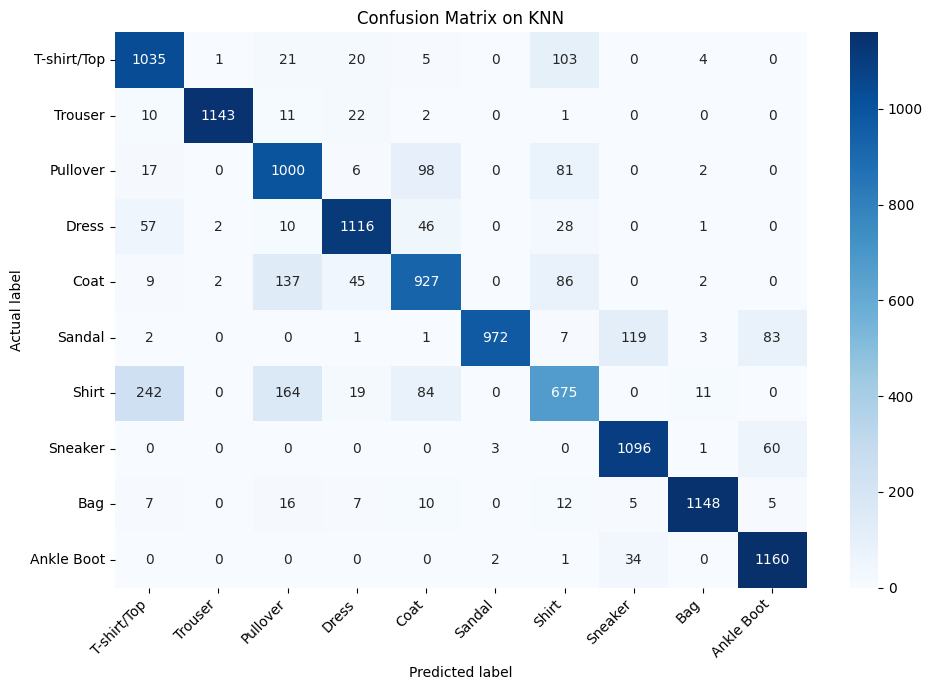

In [ ]:
y_train_knn = knn.predict(X_train)
y_pred_knn = knn.predict(X_val)
knn_train = metrics.accuracy_score(y_train,y_train_knn)
knn_accuracy = metrics.accuracy_score(y_val, y_pred_knn)

print("Train Accuracy score: {}".format(knn_train))
print("Validation Accuracy score: {}".format(knn_accuracy))
print(metrics.classification_report(y_val, y_pred_knn, target_names=class_label_names))

con_matrix = confusion_matrix(y_val, y_pred_knn, labels=class_labels)
plt.figure(figsize = (10,7))
plt.title("Confusion Matrix on KNN")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g',
            xticklabels=class_label_names, yticklabels=class_label_names)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Train Accuracy score: 1.0
Validation Accuracy score: 0.79375
              precision    recall  f1-score   support

 T-shirt/Top       0.74      0.76      0.75      1189
     Trouser       0.95      0.94      0.94      1189
    Pullover       0.67      0.67      0.67      1204
       Dress       0.81      0.79      0.80      1260
        Coat       0.66      0.67      0.66      1208
      Sandal       0.90      0.90      0.90      1188
       Shirt       0.54      0.54      0.54      1195
     Sneaker       0.86      0.87      0.87      1160
         Bag       0.92      0.90      0.91      1210
  Ankle Boot       0.90      0.90      0.90      1197

    accuracy                           0.79     12000
   macro avg       0.79      0.79      0.79     12000
weighted avg       0.79      0.79      0.79     12000



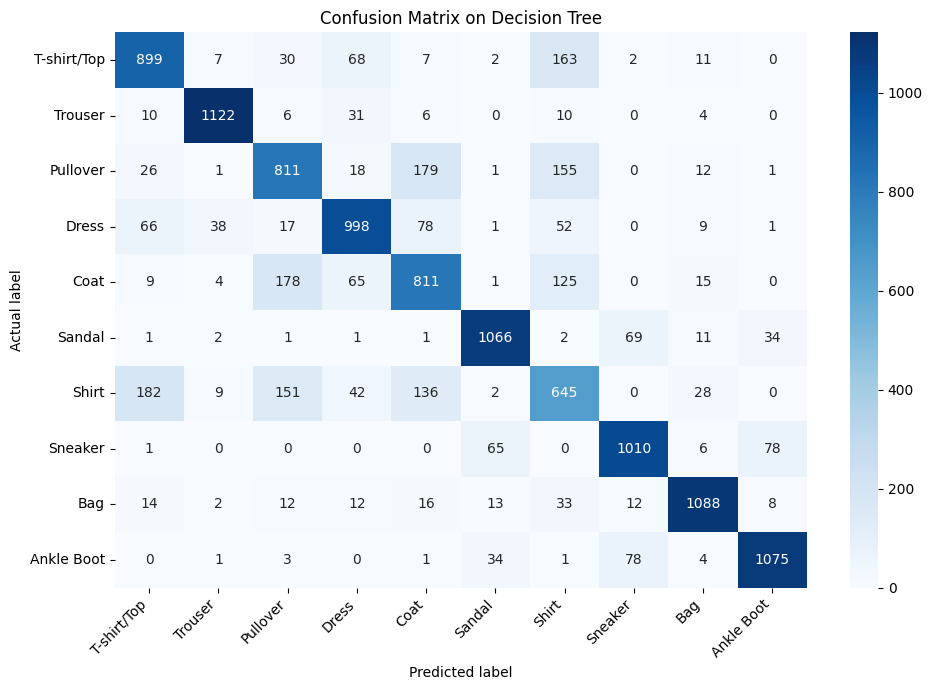

In [ ]:
y_train_dt = decision_tree.predict(X_train)
y_pred_dt = decision_tree.predict(X_val)
dt_train = metrics.accuracy_score(y_train, y_train_dt)
dt_accuracy = metrics.accuracy_score(y_val, y_pred_dt)

print("Train Accuracy score: {}".format(dt_train))
print("Validation Accuracy score: {}".format(dt_accuracy))
print(metrics.classification_report(y_val, y_pred_dt, target_names=class_label_names))

con_matrix = confusion_matrix(y_val, y_pred_dt, labels=class_labels)
plt.figure(figsize = (10,7))
plt.title("Confusion Matrix on Decision Tree")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g',
            xticklabels=class_label_names, yticklabels=class_label_names)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Model Comparison

By the end of your experiments you should generate a comparative of the obtained results.


In [ ]:
model_configs = {
    'Logistic Regression': {
        'estimator': LogisticRegression(max_iter=500, solver='lbfgs', multi_class='multinomial'),
        'param_grid': {
            'C': [0.1, 1.0, 10.0]
        }
    },
    'KNN': {
        'estimator': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    },
    'Decision Tree': {
        'estimator': DecisionTreeClassifier(random_state=0),
        'param_grid': {
            'max_depth': [None, 20, 40],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5]
        }
    },
    'SGD': {
        'estimator': SGDClassifier(max_iter=1000, tol=1e-3, random_state=0),
        'param_grid': {
            'loss': ['hinge', 'log_loss'],
            'alpha': [1e-4, 1e-3],
            'penalty': ['l2', 'l1']
        }
    }
}

model_results = []
best_estimators = {}

for model_name, cfg in model_configs.items():
    print(f'Running GridSearchCV for {model_name}...')
    grid = GridSearchCV(
        estimator=cfg['estimator'],
        param_grid=cfg['param_grid'],
        scoring='f1_macro',
        cv=3,
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    best_estimators[model_name] = grid.best_estimator_

    train_predictions = grid.best_estimator_.predict(X_train)
    val_predictions = grid.best_estimator_.predict(X_val)

    model_results.append({
        'Algorithm': model_name,
        'Train Accuracy': metrics.accuracy_score(y_train, train_predictions),
        'Validation Accuracy': metrics.accuracy_score(y_val, val_predictions),
        'Validation F1': metrics.f1_score(y_val, val_predictions, average='macro'),
        'Best Params': grid.best_params_
    })

for result in model_results:
    print(f"{result['Algorithm']} best params: {result['Best Params']}")

Running GridSearchCV for Logistic Regression...


/home/ruben/EC/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/ruben/EC/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/ruben/EC/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/ruben/EC/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_cla

Running GridSearchCV for KNN...
Running GridSearchCV for Decision Tree...
Running GridSearchCV for SGD...
Logistic Regression best params: {'C': 0.1}
KNN best params: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Decision Tree best params: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
SGD best params: {'alpha': 0.0001, 'loss': 'log_loss', 'penalty': 'l2'}


In [ ]:
results_df = pd.DataFrame(model_results).sort_values(by='Validation F1', ascending=False).reset_index(drop=True)

def _format_params(params):
    return ', '.join(f"{key}={value}" for key, value in params.items())

results_df['Best Params'] = results_df['Best Params'].apply(_format_params)
results_df


,Algorithm,Train Accuracy,Validation Accuracy,Validation F1,Best Params
0,KNN,1.000000,0.864083,0.863857,"n_neighbors=5, p=1, weights=distance"
1,Logistic Regression,0.874188,0.853333,0.852773,C=0.1
2,SGD,0.860229,0.845250,0.844639,"alpha=0.0001, loss=log_loss, penalty=l2"
3,Decision Tree,0.935750,0.810583,0.810332,"max_depth=20, min_samples_leaf=5, min_samples_..."


## Hyperparametrization and new comparison

Let's put into practice what you have learned so far and see if you can obtain better results.
The following steps should be considered:

- Evaluate Decision Tree and SGD models
- Perform Grid Search, including a list of parametrisation for each algorithm
- Have F-score as model performance reference
- Generate new comparison table and plot and interpret the obtaine dresults





In [ ]:
best_model_entry = max(model_results, key=lambda item: item['Validation F1'])
best_model_name = best_model_entry['Algorithm']
best_model = best_estimators[best_model_name]

test_predictions = best_model.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, test_predictions)
test_f1 = metrics.f1_score(y_test, test_predictions, average='macro')

print(f"Best model based on validation F1: {best_model_name}")
print(f"Best hyperparameters: {best_model_entry['Best Params']}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 macro: {test_f1:.4f}")


Best model based on validation F1: KNN
Best hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Test Accuracy: 0.8629
Test F1 macro: 0.8623
